In [72]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.linear_model import LogisticRegression

import seaborn as sn
from sklearn.ensemble import RandomForestRegressor
import nltk
from sklearn.metrics import roc_auc_score, f1_score
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from scipy import stats


In [38]:
df_train = pd.read_csv('merged_cleaned_sentiment_train.csv')
df_validation = pd.read_csv('merged_cleaned_sentiment_validation.csv')
df_test = pd.read_csv('merged_cleaned_sentiment_test.csv')

In [39]:
df = pd.concat([df_train,df_validation,df_test])
# new_df = pd.concat(pdList)

<AxesSubplot:>

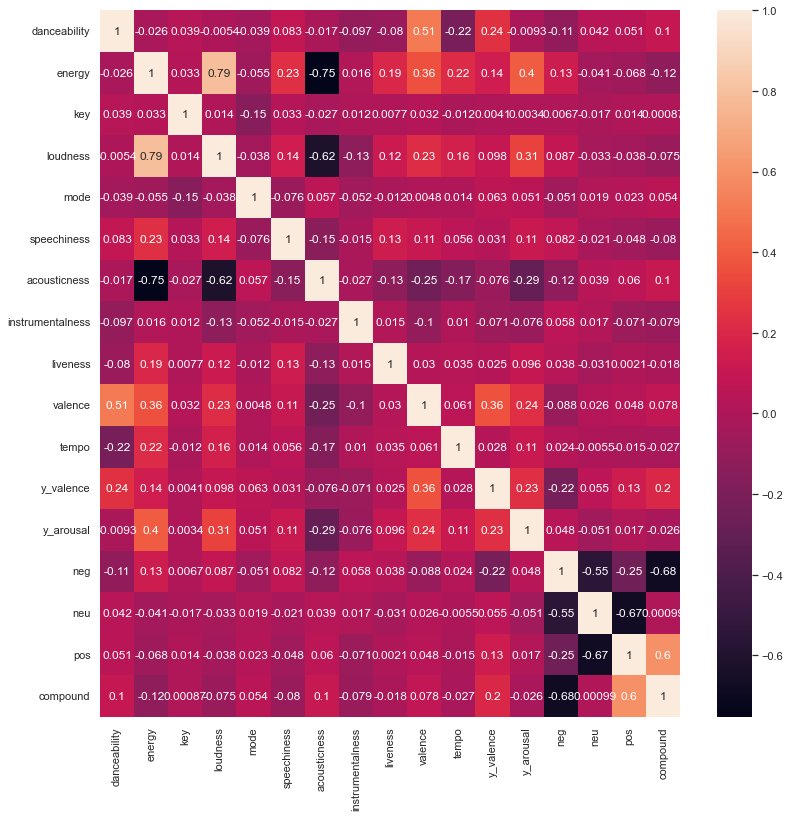

In [40]:
corrMatrix = df[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo','y_valence', 'y_arousal', 'neg','neu','pos','compound']].corr()
sn.set(rc={'figure.figsize':(13,13)})

sn.heatmap(corrMatrix, annot=True)

# print(corrMatrix)

In [10]:
df.neu.describe()


count    7596.000000
mean        0.761361
std         0.098693
min         0.175000
25%         0.702000
50%         0.770000
75%         0.831000
max         1.000000
Name: neu, dtype: float64

In [41]:
plt.scatter(df.neg,df.y_valence)

# Correlation between valence and sentiment

<AxesSubplot:>

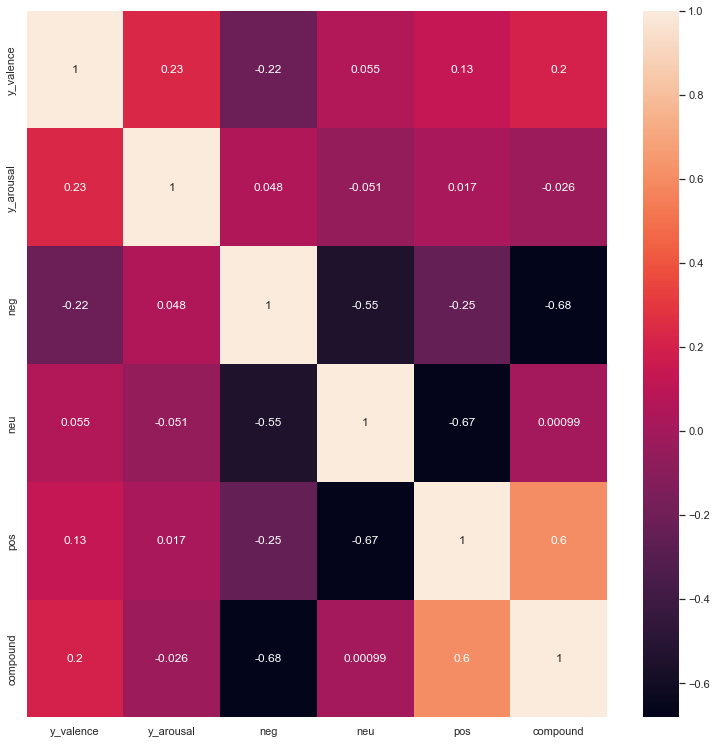

In [42]:
corrMatrix = df[['y_valence', 'y_arousal', 'neg','neu','pos','compound']].corr()
sn.set(rc={'figure.figsize':(13,13)})

sn.heatmap(corrMatrix, annot=True)

In [43]:
x_vars = [ 'neg','neu','pos','compound']
y_vars = ['y_valence', 'y_arousal']

In [45]:
for y in y_vars:
    for x in x_vars:
        r,p = pearsonr(df[x],df[y])
        print(f'For {x =} and {y = }, pearsons {r =} with {p =}')

For x ='neg' and y = 'y_valence', pearsons r =-0.2211659212558971 with p =4.502079279020964e-138
For x ='neu' and y = 'y_valence', pearsons r =0.05504264620469499 with p =7.634857217716082e-10
For x ='pos' and y = 'y_valence', pearsons r =0.13181635094063437 with p =1.7759809200035235e-49
For x ='compound' and y = 'y_valence', pearsons r =0.2016308337930724 with p =1.3075951508930892e-114
For x ='neg' and y = 'y_arousal', pearsons r =0.04774156827786184 with p =9.540535212430449e-08
For x ='neu' and y = 'y_arousal', pearsons r =-0.05146564642339331 with p =8.82074249079319e-09
For x ='pos' and y = 'y_arousal', pearsons r =0.017429163416932084 with p =0.0515588435308778
For x ='compound' and y = 'y_arousal', pearsons r =-0.02576360222084772 with p =0.004002097036981392


In [26]:
len(df)

7596

In [52]:
for y in y_vars:
    for x in x_vars:
        r,p = pearsonr(df[x],df[y])
        dof = len(df) -2
        if p < 0.05 and r >0:
            print(f'A positive correlation was found between {x} and {y}, {r = :.2}, p({dof}) = {p:.3}')
#             print(f'For {x =} and {y = }, pearsons {r =} with p({dof}) = {p}')
        if p < 0.05 and r <0:
            print(f'A negative correlation was found between {x} and {y}, {r = :.2}, p({dof}) = {p:.3}')

A negative correlation was found between neg and y_valence, r = -0.22, p(12475) = 4.5e-138
A positive correlation was found between neu and y_valence, r = 0.055, p(12475) = 7.63e-10
A positive correlation was found between pos and y_valence, r = 0.13, p(12475) = 1.78e-49
A positive correlation was found between compound and y_valence, r = 0.2, p(12475) = 1.31e-114
A positive correlation was found between neg and y_arousal, r = 0.048, p(12475) = 9.54e-08
A negative correlation was found between neu and y_arousal, r = -0.051, p(12475) = 8.82e-09
A negative correlation was found between compound and y_arousal, r = -0.026, p(12475) = 0.004


In [14]:
pearsonr(df.compound,df.y_valence)

(0.19842355904236308, 2.6614629632340983e-68)

# look at correlation valence spotify and valence ground truth

In [205]:
x = 'valence'
y = 'y_valence'
r,p = pearsonr(df[x],df[y])
      
if p < 0.05 and r >0:
    print(f'A positive correlation was found between {x} and {y}, {r = :.2}, p({dof}) = {p:.3}')
#             print(f'For {x =} and {y = }, pearsons {r =} with p({dof}) = {p}')
if p < 0.05 and r <0:
    print(f'A negative correlation was found between {x} and {y}, {r = :.2}, p({dof}) = {p:.3}')

A positive correlation was found between valence and y_valence, r = 0.36, p(12475) = 0.0


# compare sign of compound sentiment with mode

In [57]:
df[['mode']]

<bound method DataFrame.count of       mode
0        0
1        0
2        0
3        0
4        1
...    ...
2318     1
2319     1
2320     1
2321     1
2322     1

[12477 rows x 1 columns]>

In [69]:
df['y_val_bin'] = np.sign(df["y_valence"])
# df.mode

In [59]:
df['y_val_bin']

0      -1.0
1       1.0
2       1.0
3      -1.0
4       1.0
       ... 
2318   -1.0
2319   -1.0
2320   -1.0
2321    1.0
2322    1.0
Name: y_val_bin, Length: 12477, dtype: float64

In [71]:
df[['mode','y_val_bin']].hist()

array([[<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'y_val_bin'}>]], dtype=object)

In [60]:
plt.bar(df['mode'].unique(), df['mode'])

TypeError: bar() missing 1 required positional argument: 'height'

# ttest minor v major on valence (and compound)

In [77]:
df.groupby('mode')['y_valence','compound'].describe()

C:\Users\tibor\AppData\Local\Temp/ipykernel_8384/3058856436.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('mode')['y_valence','compound'].describe()


y_valence                                                              \
         count      mean       std       min       25%       50%       75%   
mode                                                                         
0       3970.0 -0.195067  1.004866 -2.148097 -1.040199 -0.308878  0.722613   
1       8507.0 -0.053110  1.076952 -2.148097 -1.040199  0.070427  0.848139   

               compound                                                 \
           max    count      mean       std     min       25%      50%   
mode                                                                     
0     1.546714   3970.0  0.181445  0.863164 -0.9999 -0.895775  0.72205   
1     1.546714   8507.0  0.280195  0.834346 -1.0000 -0.778200  0.84830   

                        
           75%     max  
mode                    
0     0.979275  0.9999  
1     0.982500  0.9999

In [112]:
def get_dof(x,y):
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [74]:
df[df['mode'] == 0].y_valence

0      -0.682725
1       0.373325
2       1.071901
3      -1.056572
11     -0.780962
          ...   
2308   -0.308878
2312   -0.780962
2314    0.678952
2315    0.373325
2316   -0.461691
Name: y_valence, Length: 3970, dtype: float64

for valence

In [123]:
group1 = df[df['mode'] == 0].y_valence
group2 = df[df['mode'] == 1].y_valence

In [124]:
ttest_valence = stats.ttest_ind(group1, group2, equal_var = False)

In [125]:
ttest_valence

Ttest_indResult(statistic=-7.1819792111608365, pvalue=7.46784078275214e-13)

In [126]:
f'''The {len(group1)} minor songs (M = {group1.mean():.2}, SD = {group1.std():.2}) compared to the {len(group2)} major songs (M = {group2.mean():.2}, SD = {group2.std():.2}) have a significantly higher valence,
t({get_dof(group1,group2):.1}) = {ttest_valence[0]:.3}, p = {ttest_valence[1]:.3} '''

'The 3970 minor songs (M = -0.2, SD = 1.0) compared to the 8507 major songs (M = -0.053, SD = 1.1) have a significantly higher valence,\nt(8e+03) = -7.18, p = 7.47e-13 '

In [83]:
ttest_valence[1]

1.8798627290759968e-09

for compound

In [127]:
group1 = df[df['mode'] == 0].compound
group2 = df[df['mode'] == 1].compound
ttest_compound = stats.ttest_ind(group1, group2, equal_var = False)


In [128]:
f'''The {len(group1)} minor songs (M = {group1.mean():.2}, SD = {group1.std():.2}) compared to the {len(group2)} major songs (M = {group2.mean():.2}, SD = {group2.std():.2}) have significantly higher compound sentiment scores,
t({get_dof(group1,group2):.1}) = {ttest_compound[0]:.3}, p = {ttest_compound[1]:.3} '''

'The 3970 minor songs (M = 0.18, SD = 0.86) compared to the 8507 major songs (M = 0.28, SD = 0.83) have significantly higher compound sentiment scores,\nt(8e+03) = -6.02, p = 1.88e-09 '

# eyeball for a song

In [129]:
df.columns

Index(['Unnamed: 0', 'artist', 'trackname', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'time_signature', 'lyrics',
       'lyrics_cleaned', 'y_valence', 'y_arousal', 'neg', 'neu', 'pos',
       'compound', 'y_val_bin'],
      dtype='object')

In [213]:
# sorted_df_val = df.sort_values(by = 'diff_val_val')

In [214]:
# sorted_df_sent = df.sort_values(by = 'diff_val_sent')

In [218]:
# sorted_df_sent.tail(100)

In [219]:
# sorted_df_val.tail(100)

In [208]:
df['diff_val_val'] = abs(df.valence- df.y_valence)

In [207]:
df['diff_val_sent'] = abs(df.compound- df.y_valence)

In [136]:
# for i in range(1000):
#     print(df[['artist', 'trackname','y_valence', 'y_arousal', 'compound']].iloc[i])

In [206]:
pd.set_option("display.max_rows", None)
df[['artist', 'trackname','y_valence', 'y_arousal', 'compound']].head()

artist             trackname  y_valence  y_arousal  compound
0  Dark Tranquillity  Insanity's Crescendo  -0.682725   0.316758   -0.9059
1     Duke Ellington               Caravan   0.373325  -0.923151    0.9909
2    Ella Fitzgerald   Lullaby Of Birdland   1.071901   0.846830    0.9456
3          cLOUDDEAD              Pop Song  -1.056572   0.736206    0.9840
4            Boney M              Rasputin   1.541257   1.704165    0.9980

In [161]:
display(df[['artist','trackname','compound','y_valence']])

artist  \
0                                  Dark Tranquillity   
1                                     Duke Ellington   
2                                    Ella Fitzgerald   
3                                          cLOUDDEAD   
4                                            Boney M   
5                                        Leona Lewis   
6                                        Leona Lewis   
7                                              Mario   
8                                Great Lake Swimmers   
9                                Great Lake Swimmers   
10                               Great Lake Swimmers   
11                                      The Bad Plus   
12                                     Charley Pride   
13                                Kris Kristofferson   
14                                     Savage Garden   
15                                     Savage Garden   
16                                     Savage Garden   
17                                     Savage Garden   
18                                     Savage Garden   
19                                     Savage Garden   
20                                    Rory Gallagher   
21                                        Will Young   
22                                     Mario Vazquez   
23                                      Toni Braxton   
24                                              MGMT   
25                                              MGMT   
26                                              MGMT   
27                                              MGMT   
28                                              MGMT   
29                                      Annie Lennox   
30                                      Annie Lennox   
31                                       The Calling   
32                                   Boys Like Girls   
33                                    Britney Spears   
34                                    Britney Spears   
35                                    Britney Spears   
36                                    Britney Spears   
37                                    Britney Spears   
38                                    Britney Spears   
39                                    Britney Spears   
40                                    Britney Spears   
41                                    Britney Spears   
42                                  Three Days Grace   
43                                  Three Days Grace   
44                                  Three Days Grace   
45                                  Three Days Grace   
46                                  Three Days Grace   
47                                       Mandy Moore   
48                                       Mandy Moore   
49                                       Mandy Moore   
50                                             Lemar   
51                                         The Coral   
52                                  System of a Down   
53                                  System of a Down   
54                                  System of a Down   
55                                         Anti-Flag   
56                                         Anti-Flag   
57                                         Anti-Flag   
58                                      Citizen Cope   
59                                     Harry Nilsson   
60                                         Pearl Jam   
61                                         Pearl Jam   
62                                        Jim Reeves   
63                                        The Zutons   
64                                        The Zutons   
65                                       Shayne Ward   
66                                       Shayne Ward   
67                                       Shayne Ward   
68                                       Shayne Ward   
69                                       Shayne Ward   
70                                     Matthew Sweet   
71            

In [195]:
df[df.artist == "OutKast"]

Unnamed: 0   artist                 trackname  danceability  energy  \
82            82  OutKast     Makes No Sense At All         0.853   0.581   
83            83  OutKast  When I Look In Your Eyes         0.695   0.528   
84            84  OutKast                A Bad Note         0.292   0.453   
358          358  OutKast                 Prototype         0.643   0.376   
1116        1116  OutKast                  Aquemini         0.707   0.661   
1117        1117  OutKast  SpottieOttieDopaliscious         0.828   0.656   
1336        1336  OutKast                   Babylon         0.770   0.444   
2034        2034  OutKast                     Roses         0.751   0.708   
2234        2234  OutKast             Crumblin' Erb         0.802   0.594   
5057        5057  OutKast                   Hey Ya!         0.727   0.974   
5182        5182  OutKast                Red Velvet         0.826   0.669   
5447        5447  OutKast                Millennium         0.879   0.607   
5525        5525  OutKast                    Spread         0.753   0.979   

      key  loudness  mode  speechiness  acousticness  ...  time_signature  \
82      2    -8.602     1       0.2960       0.05500  ...               4   
83      5    -6.812     0       0.0311       0.36600  ...               4   
84      1   -11.050     1       0.0324       0.00174  ...               4   
358     9    -7.424     1       0.0426       0.34800  ...               4   
1116    1    -5.711     0       0.3900       0.24500  ...               4   
1117    1    -6.571     1       0.2220       0.00259  ...               4   
1336   10   -12.226     0       0.4400       0.09430  ...               4   
2034    0    -5.653     1       0.0545       0.04820  ...               4   
2234    7    -9.720     1       0.2680       0.07820  ...               4   
5057    4    -2.261     0       0.0664       0.10300  ...               4   
5182   11    -9.425     0       0.2500       0.01070  ...               4   
5447   11    -5.097     0       0.3260       0.30400  ...               4   
5525   11    -5.408     1       0.2570       0.61500  ...               4   

                                                 lyrics  \
82    Man y'all play too much\mNow now Percival, don...   
83    [Intro]\mHey\mUh-huh\mWell, all right\mHow y'a...   
84    [Hook: André 3000]\mA bad note ain't no bad no...   
358   [Intro: André 3000]\mI hope that you're the on...   
1116  [Intro: Big Boi & \mAndré 3000\m]\mYuh\mUh-huh...   
1117  [Hook: André 3000, Andrea Nivet & Delvida Flah...   
1336  [Verse 1: André 3000]\mI came into this world ...   
2034  [Verse 1: André 3000]\mCaroline (Caroline), se...   
2234  [Produced by Organized Noize]\m[Verse 1: André...   
5057  [Intro: André 3000]\mOne, two, three, uh!\m[Ve...   
5182  [Intro: Big Boi]\mOne more time for y'all, y-y...   
5447  [Verse 1: André 3000]\mMe and everything aroun...   
5525  [Chorus 1: André 3000]\mI don't want to move t...   

                                         lyrics_cleaned  y_valence y_arousal  \
82    Man y'all play too much Now now Percival, don'...   0.373325 -0.923151   
83      Hey Uh-huh Well, all right How y'all doing? ...   0.747172 -0.835573   
84      A bad note ain't no bad note If it's a good ...  -1.935250 -0.655810   
358     I hope that you're the one If not, you are t...   0.135009 -0.047379   
1116    Yuh Uh-huh   Even the Sun goes down, heroes ...  -1.122064 -0.379250   
1117    Damn, damn, damn, James Damn, damn, damn, Ja...   0.373325 -0.923151   
1336    I came into this world high as a bird From s...   0.373325 -0.923151   
2034    Caroline (Caroline), see, Caroline All the g...   1.178325  1.183311   
2234      Yessuh, let me dig into your brain, folks ...   1.546714  2.119004   
5057    One, two, three, uh!   My baby don't mess ar...   1.178325  1.183311   
5182    One more time for y'all, y-y-yeah, huh If yo...  -0.308878 -0.102691   
5447    Me and everything around me is unstable like...   0.9

In [220]:
df[df.trackname == 'Hey Ya!'][['artist','trackname','compound','y_valence','valence']]

artist trackname  compound  y_valence  valence
5057  OutKast   Hey Ya!    0.9481   1.178325    0.965

In [224]:
df[df.trackname == 'Hey Ya!'].valence

5057    0.965
Name: valence, dtype: float64

In [193]:
df[df.artist == 'The Police']

Unnamed: 0      artist                             trackname  \
1774        1774  The Police                              Fall Out   
1775        1775  The Police                           Next To You   
1776        1776  The Police                       Hole In My Life   
1777        1777  The Police                       Driven To Tears   
1778        1778  The Police                  Canary In A Coalmine   
2624        2624  The Police                 Every Breath You Take   
2625        2625  The Police                   Walking On The Moon   
2627        2627  The Police  Every Little Thing She Does Is Magic   
2632        2632  The Police                               Roxanne   
2633        2633  The Police                             So Lonely   
4567        4567  The Police         The Bed's Too Big Without You   
4568        4568  The Police                         Invisible Sun   
4569        4569  The Police                      Synchronicity II   
4570        4570  The Police                          King Of Pain   
4571        4571  The Police            Wrapped Around Your Finger   
4572        4572  The Police                     Tea In The Sahara   
5850        5850  The Police                              O My God   
5851        5851  The Police                                Mother   
5863        5863  The Police                  Once Upon A Daydream   
5884        5884  The Police                   Does Everyone Stare   
5885        5885  The Police                  Too Much Information   
5886        5886  The Police                 One World (Not Three)   
5887        5887  The Police                     Man In A Suitcase   
5888        5888  The Police                   Shadows In The Rain   

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
1774         0.412   0.877    0    -4.529     1       0.0522      0.000041   
1775         0.407   0.975    4    -6.181     0       0.0666      0.045400   
1776         0.639   0.611    7    -7.506     1       0.0354      0.173000   
1777         0.615   0.523    2    -9.232     1       0.0818      0.009000   
1778         0.811   0.767   11    -9.140     0       0.0342      0.050700   
2624         0.820   0.452    1    -9.796     1       0.0348      0.543000   
2625         0.514   0.340    0   -12.779     1       0.0537      0.001420   
2627         0.558   0.768    2    -9.997     1       0.0343      0.121000   
2632         0.618   0.748    0    -8.905     1       0.3580      0.038400   
2633         0.541   0.571    7    -8.308     1       0.1600      0.012300   
4567         0.736   0.750   11   -11.273     0       0.1060      0.028700   
4568         0.573   0.396   10   -10.927     1       0.0310      0.425000   
4569         0.414   0.851    2    -8.714     1       0.0413      0.067500   
4570         0.518   0.725    2    -8.854     1       0.0338      0.389000   
4571         0.747   0.448    9   -11.522     0       0.0345      0.090400   
4572         0.555   0.243    1   -18.210     0       0.0484      0.131000   
5850         0.550   0.758    4    -9.477     0       0.0430      0.052900   
5851         0.245   0.747    4    -9.234     0       0.0754      0.052700   
5863         0.556   0.407    6   -13.177     1       0.0341      0.494000   
5884         0.611   0.754   10    -9.162     1       0.0414      0.122000   
5885         0.676   0.698    7    -9.056     1       0.0496      0.056500   
5886         0.549   0.730    0    -8.670     1       0.0855      0.004690   
5887         0.752   0.721    0    -8.019     1       0.0403      0.011200   
5888         0.704   0.528    7   -10.753     1       0.1720      0.010500   

      ...  time_signature                                             lyrics  \
1774  ...               4  [Verse 1]\mI never followed leaders\mI got no ...   
1775  ...               4  [Verse 1]\mI can't stand it for another day\mW...   
1776  ...               4  [Intro]\mYeah, yeah\mYeah, yeah\mYeah

In [169]:
df[df.artist == 'The Killers']

Unnamed: 0       artist                       trackname  danceability  \
1440        1440  The Killers      Where The White Boys Dance         0.680   
1485        1485  The Killers             When You Were Young         0.467   
1486        1486  The Killers    Bling (Confession Of A King)         0.532   
1487        1487  The Killers             For Reasons Unknown         0.504   
1488        1488  The Killers                    Read My Mind         0.543   
1489        1489  The Killers         Why Do I Keep Counting?         0.566   
1894        1894  The Killers                    Daddy's Eyes         0.285   
2743        2743  The Killers                           Human         0.557   
2744        2744  The Killers               This Is Your Life         0.612   
2745        2745  The Killers                    I Can't Stay         0.588   
2766        2766  The Killers                      Neon Tiger         0.386   
4293        4293  The Killers            All The Pretty Faces         0.430   
4294        4294  The Killers  Leave The Bourbon On The Shelf         0.285   
4295        4295  The Killers                      Sweet Talk         0.373   
4296        4296  The Killers                   Under The Gun         0.424   
4297        4297  The Killers                Romeo And Juliet         0.611   
6019        6019  The Killers                    Show You How         0.250   
6694        6694  The Killers                Somebody Told Me         0.497   
6695        6695  The Killers          Smile Like You Mean It         0.346   
6696        6696  The Killers            A Dustland Fairytale         0.429   

      energy  key  loudness  mode  speechiness  acousticness  ...  \
1440   0.869    6    -5.805     1       0.0421      0.039300  ...   
1485   0.988   11    -3.313     1       0.1120      0.000152  ...   
1486   0.931   11    -3.662     0       0.0467      0.001440  ...   
1487   0.884    3    -4.214     1       0.0366      0.000458  ...   
1488   0.917    1    -3.391     1       0.0444      0.005720  ...   
1489   0.829    3    -4.742     1       0.0404      0.016900  ...   
1894   0.924    4    -5.028     0       0.0993      0.002270  ...   
2743   0.800   10    -8.477     1       0.0601      0.001320  ...   
2744   0.899    5    -6.003     1       0.0284      0.011500  ...   
2745   0.812    8    -8.553     1       0.0696      0.182000  ...   
2766   0.779   11    -6.866     1       0.0363      0.061600  ...   
4293   0.980    7    -3.976     0       0.0741      0.004300  ...   
4294   0.867    1    -5.595     1       0.0963      0.113000  ...   
4295   0.917    2    -4.411     1       0.0509      0.005200  ...   
4296   0.962    1    -4.915     1       0.0929      0.000002  ...   
4297   0.397    9    -8.470     1       0.0266      0.430000  ...   
6019   0.573    2    -5.855     1       0.0798      0.001010  ...   
6694   0.970   10    -4.851     0       0.0836      0.000090  ...   
6695   0.965    3    -4.255     0       0.1460      0.000461  ...   
6696   0.841    2    -6.501     1       0.0553      0.043600  ...   

      time_signature                                             lyrics  \
1440               4  [Chorus]\mTake me to the place where the white...   
1485               4  [Verse 1]\mYou sit there in your heartache\mWa...   
1486               4  [Intro]\mWhen I offer you survival\mYou say it...   
1487               4  [Verse 1]\mI pack my case. I check my face\mI ...   
1488               4  [Verse 1]\mOn the corner of Main Street\mJust ...   
1489               4  [Verse 1]\mThere's a plane and I am flying\mTh...   
1894               4  [Verse 1]\mI'll tell you what you wanna know\m...   
2743               4  [Verse 1]\mI did my best to notice\mWhen the c...   
2744               4  [Verse 1]\mCandy talks to strangers\mThinks he...   
2745               4  [Verse 1]\mThe emotion it was electric\mAnd th...   
2766               4  [Verse 1]\mFar from the evergreen of old Assam...

In [173]:
df[df.artist == 'Amy Winehouse']

Unnamed: 0         artist               trackname  danceability  energy  \
1439        1439  Amy Winehouse           Wake Up Alone         0.583   0.271   
2103        2103  Amy Winehouse                   Rehab         0.407   0.558   
2104        2104  Amy Winehouse           Back To Black         0.403   0.422   
2105        2105  Amy Winehouse   Love Is A Losing Game         0.484   0.293   
2106        2106  Amy Winehouse  Tears Dry On Their Own         0.634   0.543   
2107        2107  Amy Winehouse    He Can Only Hold Her         0.626   0.504   
2767        2767  Amy Winehouse            Know You Now         0.846   0.669   
2768        2768  Amy Winehouse            October Song         0.672   0.842   
2769        2769  Amy Winehouse         'Round Midnight         0.480   0.803   
2770        2770  Amy Winehouse            Just Friends         0.749   0.462   
7570        7570  Amy Winehouse        Stronger Than Me         0.884   0.510   

      key  loudness  mode  speechiness  acousticness  ...  time_signature  \
1439   11   -15.866     0       0.0299        0.5450  ...               3   
2103    0   -13.609     1       0.0552        0.0541  ...               4   
2104    7   -13.964     0       0.0373        0.1340  ...               4   
2105    0   -16.544     1       0.0311        0.3370  ...               4   
2106    1   -13.391     0       0.1810        0.5250  ...               4   
2107   11   -14.978     1       0.0730        0.0210  ...               4   
2767    5    -6.440     0       0.0736        0.0372  ...               4   
2768    0    -7.673     1       0.2560        0.0112  ...               3   
2769    8    -7.232     0       0.0705        0.0144  ...               4   
2770    9   -15.449     1       0.0452        0.0417  ...               4   
7570    9    -4.679     0       0.0392        0.0436  ...               4   

                                                 lyrics  \
1439  [Verse 1]\mIt's okay in the day, I'm staying b...   
2103  [Produced by Mark Ronson]\m[Chorus]\mThey trie...   
2104  [Verse 1]\mHe left no time to regret\mKept his...   
2105  [Verse 1]\mFor you, I was a flame\mLove is a l...   
2106  [Produced by Salaam Remi]\m[Verse 1]\mAll I ca...   
2107  [Intro]\mWoah, ooh\mOh, oh-oh, woah\mOh\m[Vers...   
2767  [Verse 1]\mYou're just a little boy underneath...   
2768  [Verse 1]\mToday, my bird flew away\mGone to f...   
2769  [Verse 1]\mIt begins to tell 'round midnight, ...   
2770  [Verse 1]\mWhen will we get the time to be jus...   
7570  [Verse 1]\mYou should be stronger than me\mYou...   

                                         lyrics_cleaned  y_valence y_arousal  \
1439    It's okay in the day, I'm staying busy Tied ...  -1.102053 -0.081181   
2103      They tried to make me go to rehab, but I s...   0.373325 -0.923151   
2104    He left no time to regret Kept his dick wet ...  -1.062810 -0.111909   
2105    For you, I was a flame Love is a losing game...  -0.754844  0.218645   
2106      All I can ever be to you is the darkness t...   0.246435  0.694722   
2107    Woah, ooh Oh, oh-oh, woah Oh   He can only h...   0.373325 -0.923151   
2767    You're just a little boy underneath that hat...  -1.935250 -0.655810   
2768    Today, my bird flew away Gone to find her bi...  -0.679996 -0.499093   
2769    It begins to tell 'round midnight, 'round mi...   1.541257  1.704165   
2770    When will we get the time to be just friends...   0.373325 -0.923151   
7570    You should be stronger than me You been here...   0.808116  0.170796   

        neg    neu    pos  compound  y_val_bin  
1439  0.157  0.795  0.049   -0.9769       -1.0  
2103  0.116  0.807  0.076   -0.9002        1.0  
2104  0.137  0.783  0.079   -0.9042       -1.0  
2105  0.232  0.441  0.328    0.9734       -1.0  
2106  0.106  0.813  0.081   -0.6065        1.0  
2107  0.036  0.900  0.064    0.7041        1.0  
2767  0.039  0.888  0.073    0.7699       -1.0  
2768  0.036  0.733  0.231    0.9923       -1.0